In [1]:
#Importações

%matplotlib notebook

import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Regression Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

from IPython.display import display

In [2]:
#Função para Regressão
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [3]:
data = pd.read_csv("Admission_Predict.csv")

In [4]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
#Criação do DataFrame
df = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']]
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


<IPython.core.display.Javascript object>


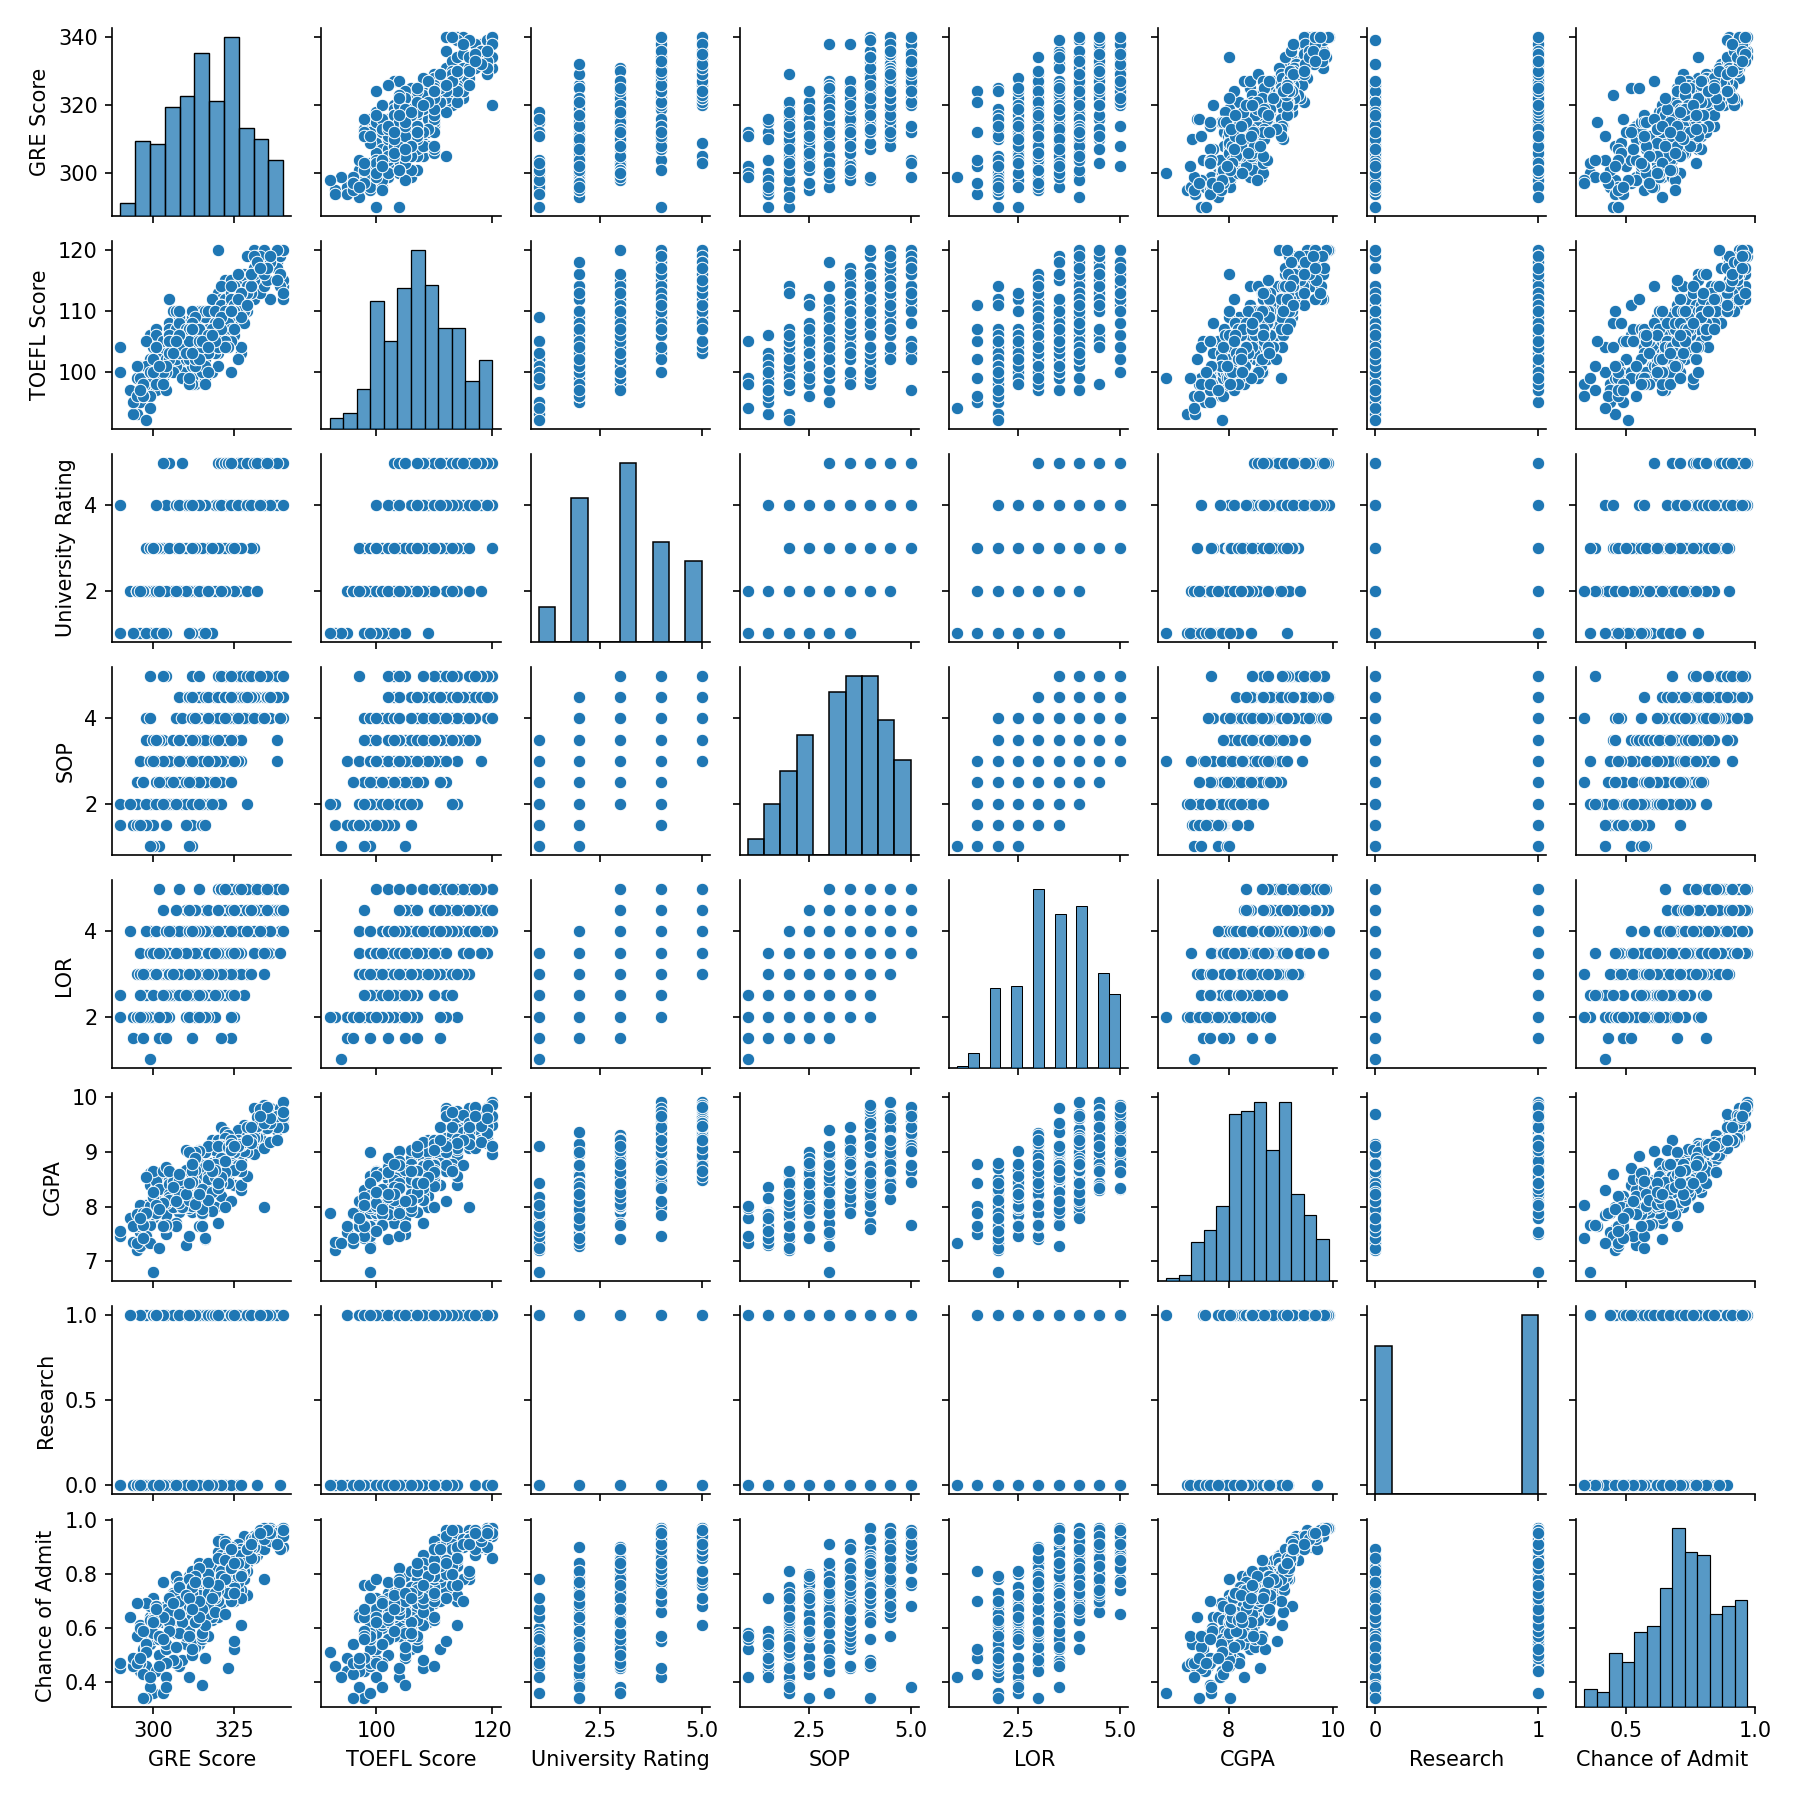

In [6]:
#Análise exploratória por meio de gráficos
sns.pairplot(df, height = 1.5)

In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [24]:
#Montagem da Regression Tree
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
Y = df['Chance of Admit ']

In [25]:
# 70% de treinamento and 30% de teste 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 

In [26]:
clf = DecisionTreeRegressor()

clf = clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

In [28]:
metrics.r2_score(Y_test, Y_pred) 

0.6563521389441103

In [30]:
Y_pred

array([0.76, 0.65, 0.79, 0.73, 0.85, 0.66, 0.66, 0.54, 0.49, 0.93, 0.82,
       0.94, 0.92, 0.73, 0.75, 0.77, 0.68, 0.92, 0.34, 0.79, 0.57, 0.77,
       0.85, 0.9 , 0.64, 0.67, 0.75, 0.81, 0.94, 0.71, 0.95, 0.64, 0.87,
       0.76, 0.78, 0.71, 0.47, 0.71, 0.95, 0.8 , 0.89, 0.67, 0.89, 0.73,
       0.96, 0.57, 0.71, 0.8 , 0.67, 0.7 , 0.8 , 0.61, 0.79, 0.77, 0.71,
       0.89, 0.46, 0.64, 0.82, 0.69, 0.94, 0.71, 0.85, 0.71, 0.6 , 0.79,
       0.85, 0.71, 0.72, 0.66, 0.81, 0.54, 0.73, 0.68, 0.81, 0.46, 0.72,
       0.64, 0.73, 0.73, 0.68, 0.89, 0.63, 0.48, 0.72, 0.56, 0.71, 0.97,
       0.69, 0.74, 0.54, 0.68, 0.79, 0.73, 0.49, 0.48, 0.65, 0.82, 0.88,
       0.91, 0.68, 0.49, 0.73, 0.49, 0.82, 0.85, 0.82, 0.59, 0.91, 0.65,
       0.76, 0.49, 0.9 , 0.72, 0.7 , 0.36, 0.69, 0.79, 0.74, 0.81])

In [31]:
#Análise para uma regressão (Ainda em montagem)
resultados = regress(Y,X)
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Tue, 23 Nov 2021   Prob (F-statistic):          3.12e-134
Time:                        19:51:28   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2594      0.125    -10.097      0.000      -1.505      -1.014
GRE Score             0.0017      0.001      2.906      0.004       0.001       0.003
TOEFL Score           0.0029      0.001      2.680      0.008       0.001       0.005
University Rating     0.0057      0.005      1.198      0.232      -0.004       0.015
SOP                  -0.0033      0.006     -0.594      0.553      -0.014       0.008
LOR                   0.0224      0.006      4.034      0.000       0.011       0.033
CGPA                  0.1189      0.012      9.734      0.000       0.095       0.143
Research              0.0245      0.008      3.081      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.895   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.191
Skew:                          -1.159   Prob(JB):                     4.52e-40
Kurtosis:                       5.344   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
X_2 = df[['GRE Score', 'TOEFL Score', 'LOR ', 'CGPA', 'Research']]
Y_2 = df['Chance of Admit ']

In [18]:
resultados_2 = regress(Y_2,X_2)
resultados_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     320.6
Date:                Tue, 23 Nov 2021   Prob (F-statistic):          2.04e-136
Time:                        19:46:40   Log-Likelihood:                 536.61
No. Observations:                 400   AIC:                            -1061.
Df Residuals:                     394   BIC:                            -1037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2985      0.117    -11.070      0.000      -1.529      -1.068
GRE Score       0.0018      0.001      2.992      0.003       0.001       0.003
TOEFL Score     0.0030      0.001      2.847      0.005       0.001       0.005
LOR             0.0228      0.005      4.741      0.000       0.013       0.032
CGPA            0.1210      0.012     10.312      0.000       0.098       0.144
Research        0.0246      0.008      3.103      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.489   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.337
Skew:                          -1.157   Prob(JB):                     1.14e-39
Kurtosis:                       5.325   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
const = resultados_2.params[0]
GRE = resultados_2.params[1]
TOEFL = resultados_2.params[2]
LOR = resultados_2.params[3]
CGPA = resultados_2.params[4]
research = resultados_2.params[5]
print('coeficiente linear estimado: {0}'.format(const))
print('menor coeficiente angular estimado: {0}'.format(GRE))
print('maior coeficiente angular estimado: {0}'.format(CGPA))

coeficiente linear estimado: -1.2984636481455347
menor coeficiente angular estimado: 0.0017820107847750194
maior coeficiente angular estimado: 0.12100420444480256


<IPython.core.display.Javascript object>


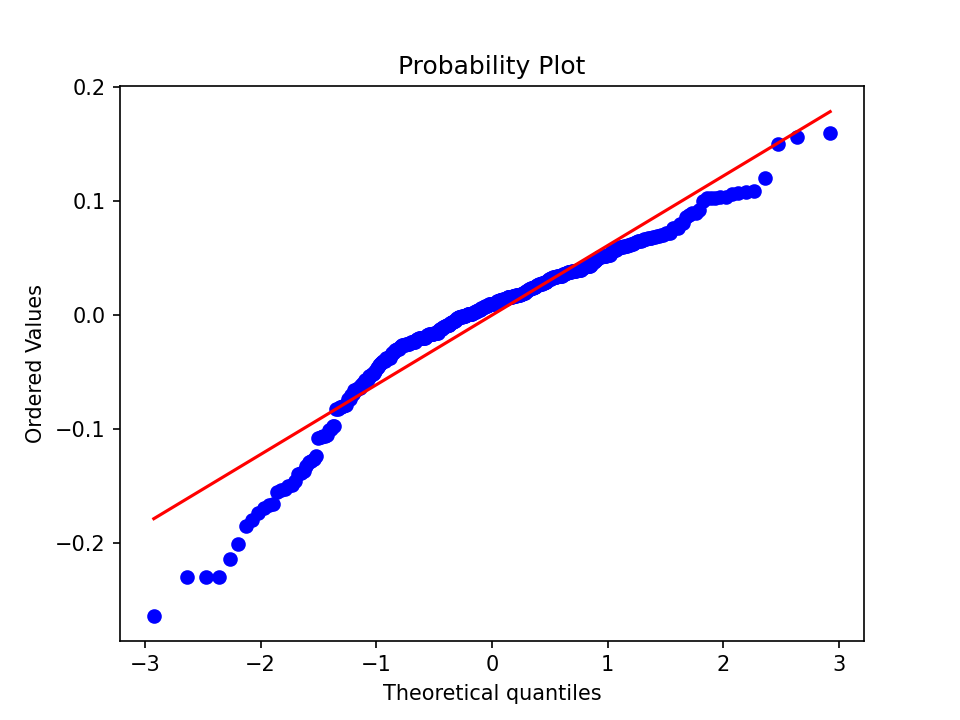

In [20]:
plt.figure()
probplot(resultados_2.resid, dist="norm", plot=plt)
plt.show()